In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import missingno as msno
import scikitplot as skplt

from numpy import sqrt
from numpy import argmax
from sklearn.metrics import precision_recall_curve

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
import MultiColumnLabelEncoder
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import KFold, GridSearchCV
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import shap

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from prettytable import PrettyTable
from lightgbm import LGBMClassifier
from sklearn.svm import LinearSVC, SVC

import optuna
import pickle
import mlxtend
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score,balanced_accuracy_score,recall_score, f1_score, precision_score, roc_auc_score,confusion_matrix, roc_curve

from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import pickle

pd.options.display.max_columns = 180

In [2]:
df = pd.read_csv('my_df.csv')
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Single / not married,House / apartment,9461.0,637.000000,Laborers,1.0,Business Entity Type 3,0.2629485927471776,0.1393757800997895,1,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Married,House / apartment,16765.0,1188.000000,Core staff,2.0,School,0.6222457752555098,True,1,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Single / not married,House / apartment,19046.0,225.000000,Laborers,1.0,Government,0.5559120833904428,0.7295666907060153,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Civil marriage,House / apartment,19005.0,3039.000000,Laborers,2.0,Business Entity Type 3,0.6504416904014653,True,1,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Single / not married,House / apartment,19932.0,3038.000000,Core staff,1.0,Religion,0.3227382869704046,True,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Working,Separated,With parents,9327.0,236.000000,Sales staff,1.0,Services,0.6816323695725598,True,0,0,1
307503,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Pensioner,Widow,House / apartment,20775.0,67725.569893,Laborers,1.0,XNA,0.115992072816749,True,1,0,0
307504,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Working,Separated,House / apartment,14966.0,7921.000000,Managers,1.0,School,0.5357217517056361,0.2188590822283744,1,0,0
307505,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Commercial associate,Married,House / apartment,11961.0,4786.000000,Laborers,2.0,Business Entity Type 1,0.5141628203855193,0.6610235391308081,1,0,0


In [3]:
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])
df['DAYS_EMPLOYED'] = abs(df['DAYS_EMPLOYED'])

In [4]:
objList = df.select_dtypes(include = "object").columns
label_encoder = LabelEncoder()
for i in objList:
    df[i] = label_encoder.fit_transform(df[i].astype(str))

df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8
0,100002,1,0,1,0,1,0,202500.0,406597.5,3501,505,7,3,1,9461.0,637.000000,8,0,5,28032,287,1,0,0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,5978,46,4,1,1,16765.0,1188.000000,3,8,39,85037,814,1,0,0
2,100004,0,1,1,1,1,0,67500.0,135000.0,11786,131,7,3,1,19046.0,225.000000,8,0,11,72789,677,0,0,0
3,100006,0,0,0,0,1,0,135000.0,312682.5,4616,458,7,0,1,19005.0,3039.000000,8,8,5,90517,814,1,0,0
4,100007,0,0,1,0,1,0,121500.0,513000.0,2863,677,7,3,1,19932.0,3038.000000,3,0,37,35979,814,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,456251,0,0,1,0,0,0,157500.0,254700.0,4143,376,7,2,5,9327.0,236.000000,14,0,43,96814,814,0,0,1
307503,456252,0,0,0,0,1,0,72000.0,269550.0,572,376,3,5,1,20775.0,67725.569893,8,0,57,11535,814,1,0,0
307504,456253,0,0,0,0,1,0,153000.0,677664.0,4683,730,7,2,1,14966.0,7921.000000,10,0,39,69205,363,1,0,0
307505,456254,1,0,0,0,1,0,171000.0,370107.0,2486,476,1,1,1,11961.0,4786.000000,8,8,3,65460,632,1,0,0


In [5]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8'],
      dtype='object')

In [6]:
scaler = MinMaxScaler()
scaler.fit(df)
df_scaler = scaler.transform(df)

In [7]:
df_scaler=pd.DataFrame(df_scaler, columns=df.columns)
df_scaler

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8
0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.567100,0.230129,0.256071,0.503992,1.000000,0.6,0.2,0.111161,0.009406,0.470588,0.000000,0.087719,0.233931,0.352580,1.0,0.0,0.0
1,0.000003,0.0,0.0,0.0,0.0,0.0,0.0,0.783550,0.794577,0.437244,0.045908,0.571429,0.2,0.2,0.522886,0.017541,0.176471,0.470588,0.684211,0.709647,1.000000,1.0,0.0,0.0
2,0.000006,0.0,1.0,1.0,1.0,1.0,0.0,0.134199,0.057278,0.862054,0.130739,1.000000,0.6,0.2,0.651466,0.003322,0.470588,0.000000,0.192982,0.607436,0.831695,0.0,0.0,0.0
3,0.000011,0.0,0.0,0.0,0.0,1.0,0.0,0.350649,0.170360,0.337624,0.457086,1.000000,0.0,0.2,0.649154,0.044872,0.470588,0.470588,0.087719,0.755378,1.000000,1.0,0.0,0.0
4,0.000014,0.0,0.0,1.0,0.0,1.0,0.0,0.307359,0.297847,0.209406,0.675649,1.000000,0.6,0.2,0.701409,0.044858,0.176471,0.000000,0.649123,0.300250,1.000000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,0.999989,0.0,0.0,1.0,0.0,0.0,0.0,0.422799,0.133458,0.303028,0.375250,1.000000,0.4,1.0,0.103608,0.003485,0.823529,0.000000,0.754386,0.807928,1.000000,0.0,0.0,1.0
307503,0.999992,0.0,0.0,0.0,0.0,1.0,0.0,0.148629,0.142909,0.041837,0.375250,0.428571,1.0,0.2,0.748929,1.000000,0.470588,0.000000,1.000000,0.096261,1.000000,1.0,0.0,0.0
307504,0.999994,0.0,0.0,0.0,0.0,1.0,0.0,0.408369,0.402643,0.342525,0.728543,1.000000,0.4,0.2,0.421477,0.116957,0.588235,0.000000,0.684211,0.577526,0.445946,1.0,0.0,0.0
307505,0.999997,1.0,0.0,0.0,0.0,1.0,0.0,0.466089,0.206906,0.181831,0.475050,0.142857,0.2,0.2,0.252086,0.070668,0.470588,0.470588,0.052632,0.546274,0.776413,1.0,0.0,0.0


In [8]:
x = df_scaler.drop(["TARGET","SK_ID_CURR"] ,axis = 1)
y = df_scaler['TARGET']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)
x_train.shape, x_test.shape

((215254, 22), (92253, 22))

In [10]:
x_test

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8
289122,0.0,0.0,0.0,1.0,0.000000,0.163059,0.014320,0.771943,0.798403,1.000000,0.2,0.2,0.208568,0.050513,0.176471,0.470588,0.491228,0.978611,0.719902,1.0,0.0,0.0
188488,0.0,0.0,0.0,1.0,0.000000,0.350649,0.114556,0.119807,0.375250,1.000000,0.2,0.2,0.566742,0.156101,0.176471,0.470588,0.491228,0.537620,0.712531,0.0,0.0,1.0
181174,0.0,0.0,0.0,1.0,0.000000,0.422799,0.554625,0.290301,0.853293,0.142857,0.2,0.8,0.140079,0.003632,0.470588,0.470588,0.087719,0.437036,0.780098,0.0,0.0,1.0
247946,0.0,0.0,0.0,1.0,0.052632,0.639250,0.426465,0.719061,0.799401,0.142857,0.6,0.2,0.516122,0.046925,0.588235,0.470588,0.087719,0.512167,0.745700,1.0,0.0,0.0
231635,0.0,1.0,0.0,1.0,0.000000,0.783550,0.830534,0.554857,0.131737,0.142857,0.2,0.2,0.302931,0.007368,0.470588,0.470588,0.087719,0.043136,1.000000,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287903,0.0,0.0,1.0,1.0,0.105263,0.639250,0.378723,0.363882,0.610778,0.142857,0.2,0.2,0.151015,0.014913,0.470588,0.647059,0.087719,0.901561,1.000000,0.0,0.0,1.0
125581,0.0,0.0,0.0,1.0,0.000000,0.494949,0.749714,0.646358,0.042914,0.142857,0.2,0.2,0.521477,0.027981,0.588235,0.470588,0.052632,0.805950,0.687961,1.0,0.0,0.0
51500,0.0,1.0,1.0,1.0,0.000000,0.494949,0.352597,0.854959,0.376248,0.142857,0.0,0.2,0.675592,0.005965,0.235294,0.470588,0.736842,0.263281,0.857494,1.0,0.0,0.0
276435,1.0,0.0,0.0,1.0,0.000000,0.350649,0.100237,0.002779,0.321357,1.000000,0.6,0.2,0.027790,0.004001,0.823529,0.000000,0.087719,0.419252,0.589681,0.0,0.0,0.0


In [11]:
# x_test.to_csv('x_test.csv', index=False)

In [12]:
y_train.value_counts()

0.0    197862
1.0     17392
Name: TARGET, dtype: int64

### Rééquilibrer les données

In [13]:
smote = SMOTE(sampling_strategy='minority')
x_train_smote,y_train_smote = smote.fit_resample(x_train,y_train)

In [14]:
y_train_smote.value_counts()

0.0    197862
1.0    197862
Name: TARGET, dtype: int64

### LGBMClassifier

In [17]:
lgb = LGBMClassifier()
lgb.fit(x_train_smote,y_train_smote)

lgb_pred = lgb.predict(x_test)

[LightGBM] [Info] Number of positive: 197862, number of negative: 197862
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4041
[LightGBM] [Info] Number of data points in the train set: 395724, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [18]:
lgb_pred_proba = lgb.predict_proba(x_test)[::,1]

print('Test roc_auc score', roc_auc_score(y_test,lgb_pred_proba))
print('Test Accuracy score', accuracy_score(y_test,lgb_pred))

Test roc_auc score 0.6871583219589616
Test Accuracy score 0.9026156330959427


### DummyClassifier

In [22]:
dummy = DummyClassifier()
dummy.fit(x_train_smote,y_train_smote)
dummy_pred = dummy.predict(x_test)

In [23]:
dummy_pred_proba = dummy.predict_proba(x_test)[::,1]

print('Test roc_auc score', roc_auc_score(y_test,dummy_pred_proba))
print('Test Accuracy score', accuracy_score(y_test,dummy_pred))


Test roc_auc score 0.5
Test Accuracy score 0.9194280944793123


### AdaBoostClassifier

In [26]:
ada = AdaBoostClassifier()
ada.fit(x_train_smote,y_train_smote)

ada_pred = ada.predict(x_test)

In [27]:
ada_pred_proba = ada.predict_proba(x_test)[::,1]

print('Test roc_auc score', roc_auc_score(y_test,ada_pred_proba))
print('Test Accuracy score', accuracy_score(y_test,ada_pred))

Test roc_auc score 0.6656663934195071
Test Accuracy score 0.7716930614722557


### GradientBoostingClassifier

In [30]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train_smote,y_train_smote)

gbc_pred = gbc.predict(x_test)

In [31]:
gbc_pred_proba = gbc.predict_proba(x_test)[::,1]

print('Test roc_auc score', roc_auc_score(y_test,gbc_pred_proba))
print('Test Accuracy score', accuracy_score(y_test,gbc_pred))

Test roc_auc score 0.6816270432907312
Test Accuracy score 0.8571536968987459


In [34]:
classifiers = [lgb, gbc, dummy, ada]

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

for cls in classifiers:
    model = cls.fit(x_train_smote,y_train_smote)
    yproba = model.predict_proba(x_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

result_table.set_index('classifiers', inplace=True)

[LightGBM] [Info] Number of positive: 197862, number of negative: 197862
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047909 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4041
[LightGBM] [Info] Number of data points in the train set: 395724, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


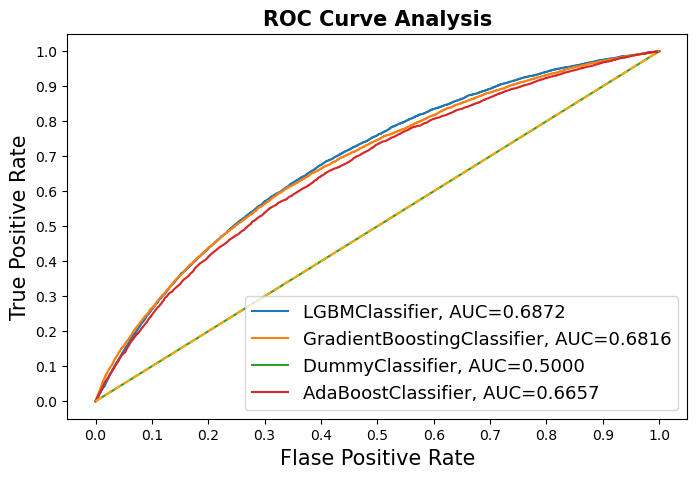

In [35]:
fig = plt.figure(figsize=(8,5))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.4f}".format(i, result_table.loc[i]['auc'])
             )
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

### Le meilleur modèle dans notre cas est LGBMClassifier 

In [36]:
matrix = confusion_matrix(y_test, lgb_pred)
print(matrix)

[[82730  2090]
 [ 6894   539]]


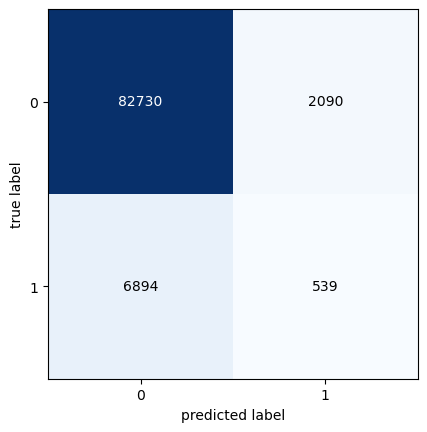

In [37]:
fig, ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()

### Hyperparameter pour LGBMClassifier

In [38]:
param_grid = {'learning_rate':[0.2,0.1,0.01,0.05,0.001],
             'num_leaves':range(10,100,10),
             'min_child_samples':range(500,1000,100),
             'reg_alpha':[0.1,0.01,0.2,0.3],
             'reg_lambda':[0.1,0.01,0.2,0.3],
             'n_estimators':range(50,300,50),
             'max_bin': range(500,1500,100)}

In [39]:
# from sklearn.model_selection import StratifiedKFold

# cv = StratifiedKFold(n_splits=3)

# lgb_CV = GridSearchCV(lgb, param_grid,cv=cv)
# lgb_CV_predict=lgb_CV.fit(x_train_smote,y_train_smote).predict(x_test)
# print("Meilleurs hyperparamètres lgb_CV:", lgb_CV.best_params_)

In [40]:
lgb_cv = LGBMClassifier(**{'reg_lambda': 0.1, 
                        'reg_alpha': 0.2, 
                        'num_leaves': 70, 
                        'n_estimators': 250, 
                        'min_child_samples': 800, 
                        'learning_rate': 0.05,
                        'max_bin': 500,
                        'objective': 'binary',
                        'n_jobs': -1,
                        'class_weight':'balanced',
                        'random_state':100})
lgb_cv.fit(x_train_smote,y_train_smote)

lgb_cv_pred = lgb_cv.predict(x_test)

[LightGBM] [Info] Number of positive: 197862, number of negative: 197862
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7727
[LightGBM] [Info] Number of data points in the train set: 395724, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [41]:
lgb_pred_proba_cv = lgb_cv.predict_proba(x_test)[::,1]
# auc_lgb = metrics.roc_auc_score(y_test, lgb_pred_proba)
# auc_lgb
print('Test roc_auc score', roc_auc_score(y_test,lgb_pred_proba_cv))

print('Test Accuracy score', accuracy_score(y_test,lgb_cv_pred))

Test roc_auc score 0.7064290797365369
Test Accuracy score 0.9076236003165209


[LightGBM] [Info] Number of positive: 197862, number of negative: 197862
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7727
[LightGBM] [Info] Number of data points in the train set: 395724, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


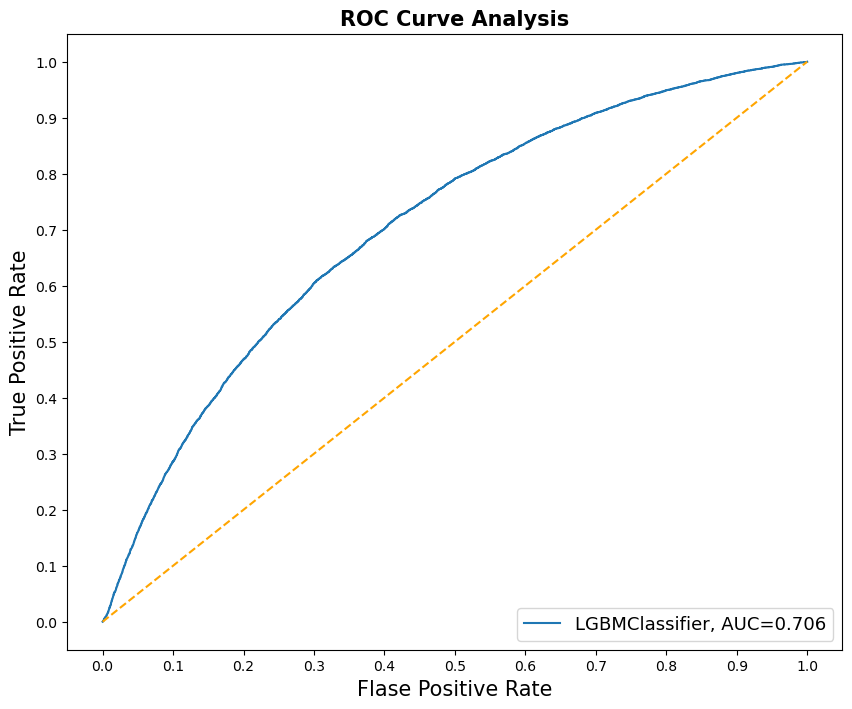

In [42]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

classifiers = [lgb_cv]

for cls in classifiers:
    model = cls.fit(x_train_smote, y_train_smote)
    yproba = model.predict_proba(x_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(10,8))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc'])
             )
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [43]:
pickle.dump(lgb_cv, open('C:/Users/User_01/Desktop/zh_7/trained_mode.pkl', 'wb'))

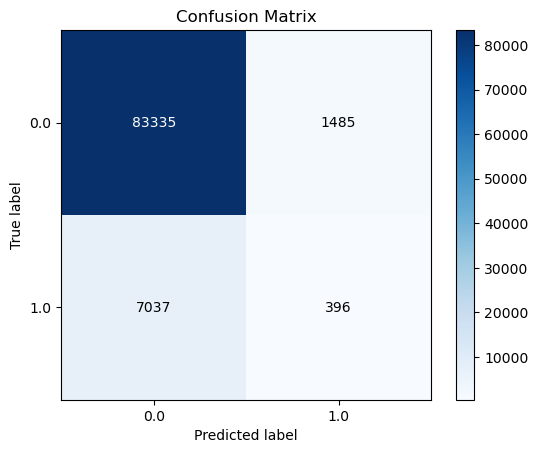

In [44]:
skplt.metrics.plot_confusion_matrix(y_test, lgb_cv_pred);

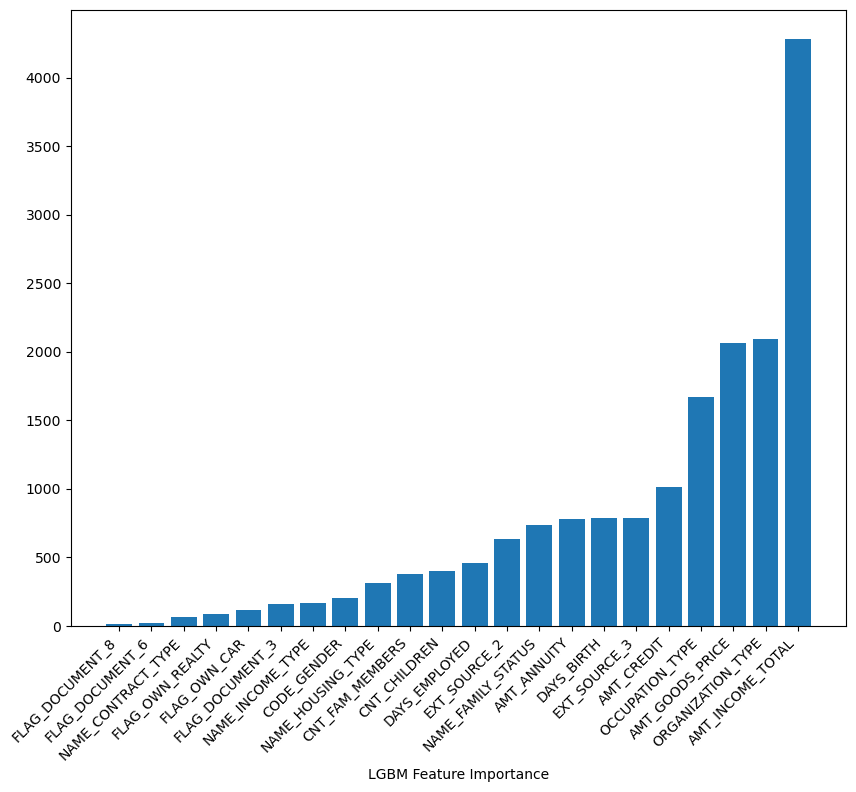

In [45]:
lgb_cv_importance=lgb_cv.feature_importances_

sorted_idx = lgb_cv_importance.argsort()
fig = plt.figure(figsize=(10,8))
plt.bar(x_train_smote.columns[sorted_idx], lgb_cv_importance[sorted_idx])
plt.xticks(rotation=45, ha='right')
plt.xlabel("LGBM Feature Importance");

In [46]:
var_imp = pd.Series(lgb_cv_importance, index=x_train_smote.columns).sort_values(ascending=False)
var_imp

AMT_INCOME_TOTAL      4280
ORGANIZATION_TYPE     2096
AMT_GOODS_PRICE       2064
OCCUPATION_TYPE       1670
AMT_CREDIT            1013
EXT_SOURCE_3           788
DAYS_BIRTH             787
AMT_ANNUITY            780
NAME_FAMILY_STATUS     739
EXT_SOURCE_2           637
DAYS_EMPLOYED          461
CNT_CHILDREN           404
CNT_FAM_MEMBERS        379
NAME_HOUSING_TYPE      314
CODE_GENDER            207
NAME_INCOME_TYPE       170
FLAG_DOCUMENT_3        159
FLAG_OWN_CAR           117
FLAG_OWN_REALTY         84
NAME_CONTRACT_TYPE      64
FLAG_DOCUMENT_6         21
FLAG_DOCUMENT_8         16
dtype: int32

Nous crééons une métrique personnalisée ayant une approche métier. Le but ici est de pénaliser plus fortement les faux négatifs (mauvais client prédit bon client) qui engendrent une grande perte de capital. On suppose ici que le coût d’un FN (Faux Négatif) est dix fois supérieur au coût d’un FP (Faux Positif).

In [128]:
def score_bank(tn, fp, fn, tp, coeff_tn, coeff_fp, coeff_fn, coeff_tp):

    total = (coeff_tn*tn + coeff_fp*fp + coeff_fn*fn + coeff_tp*tp)

    #calcul du gain maximal que peut avoir la banque quand il n'y a pas de perte d'argent. C'est à dire que le modèle ne détecte que TN et les TP.
    max_gain = (tn + fp)*coeff_tn + (tp + fn)*coeff_tp

    #calcul du gain minimal (perte) que peut avoir la banque quand il n'y a pas de gain d'argent. C'est à dire que le modèle ne détecte que FN et les FP.
    min_gain = (tn + fp)*coeff_fp + (tp + fn)*coeff_fn

     
    score = (total - min_gain)/(max_gain - min_gain)

    return score

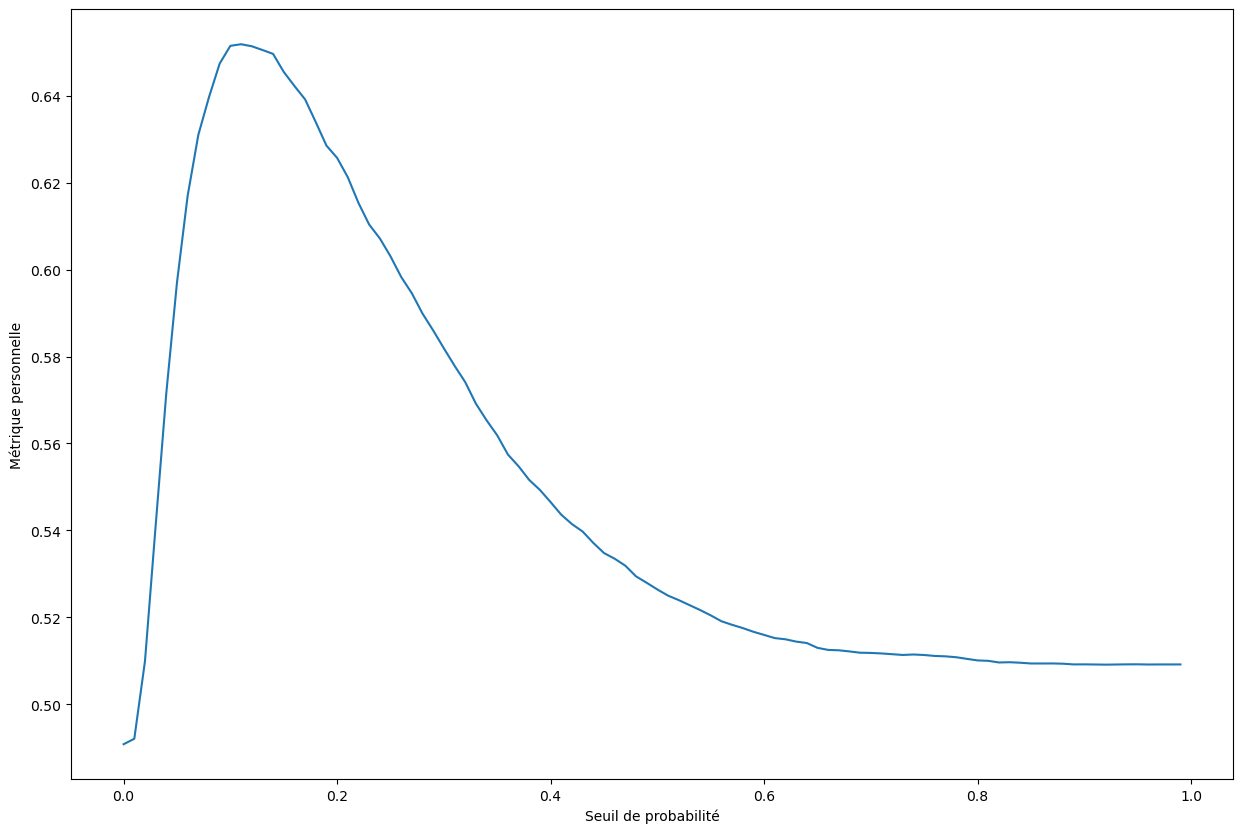

In [149]:
probability = lgb_cv.predict_proba(x_test)
probability_default_payment = probability[:, 1]


scor_int = []
int_seuil = np.arange(0, 1, 0.01)

for s in int_seuil:
    
  # Score du modèle : 0 à 1
  y_seuil=[]

  for i in probability_default_payment:
    if i >= s:
      y_seuil.append(1)
    elif i < s:
       y_seuil.append(0)

  tn, fp, fn, tp = confusion_matrix(y_test, y_seuil, labels=[0, 1]).ravel()
  
  scor_int.append(score_bank(tn, fp, fn, tp, 0, -1, -10, 1))
    
# Affichage du gain en fonction du seuil de solvabilité    
plt.figure(figsize=(15, 10))
plt.plot(int_seuil, scor_int)
plt.xlabel("Seuil de probabilité")
plt.ylabel("Métrique personnelle")
plt.show()

In [155]:
seuil = pd.DataFrame(columns=['int_seuil','scor_int'])
seuil['int_seuil'] = int_seuil
seuil['scor_int'] = scor_int

In [156]:
max = pd.DataFrame(seuil[seuil['scor_int'] == seuil['scor_int'].max()])
max

,int_seuil,scor_int
11,0.11,0.651831


In [161]:
seuil = max.iloc[0]['int_seuil']
print('Le seuil optimal pour que la banque fasse le maximum de gain est de', seuil)

Le seuil optimal pour que la banque fasse le maximum de gain est de 0.11


In [153]:
lgb_cv_pred_tr = lgb_cv.predict_proba(x_test)[:,1]

lgb_cv_proba_tr = (lgb_cv_proba > 0.11)*1
lgb_cv_proba_tr

array([0, 0, 0, ..., 1, 0, 0])

              precision    recall  f1-score   support

         0.0       0.96      0.63      0.76     84820
         1.0       0.14      0.67      0.23      7433

    accuracy                           0.64     92253
   macro avg       0.55      0.65      0.50     92253
weighted avg       0.89      0.64      0.72     92253



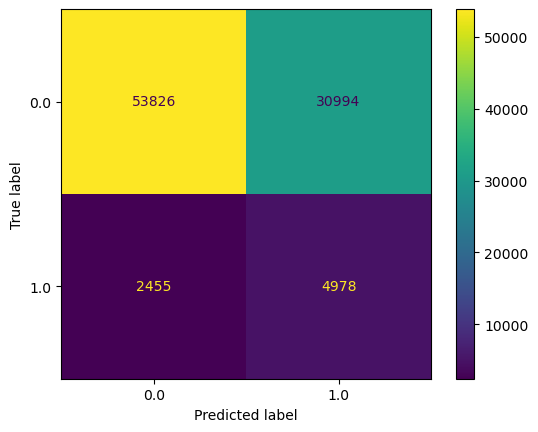

In [154]:
print(classification_report(y_test, lgb_cv_proba_tr))


cm_lgb= confusion_matrix(y_test, lgb_cv_proba_tr , labels=lgb_cv.classes_,)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lgb,
                            display_labels=lgb_cv.classes_)

disp.plot()
plt.show()

In [50]:
# explainer_shap = shap.TreeExplainer(lgb_cv)
# shap_values = explainer_shap.shap_values(x_test)

In [51]:
# shap_values_df = pd.DataFrame(data=shap_values[1], columns=x_test.columns)
# shap_values_df.shape

(92253, 22)

In [75]:
explainer = shap.Explainer(lgb_cv, x_test)
shap_values = explainer(x_test)

100%|===================| 92213/92253 [34:57<00:00]        

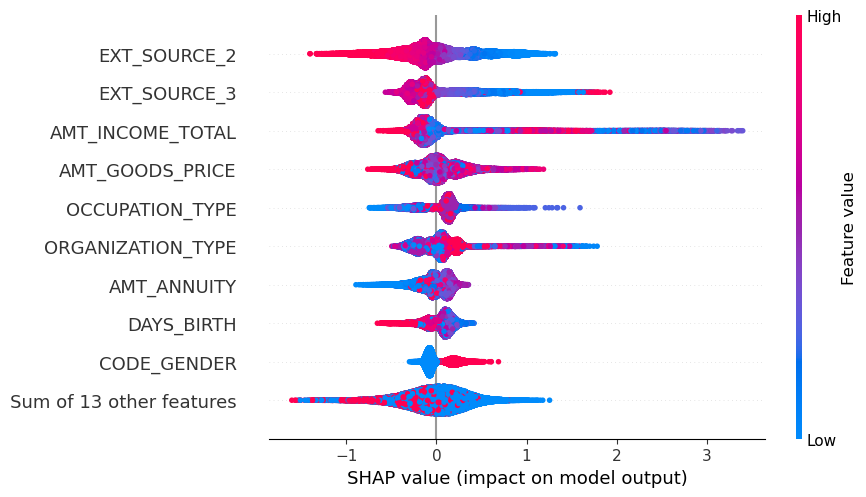

In [98]:
shap.plots.beeswarm(shap_values)

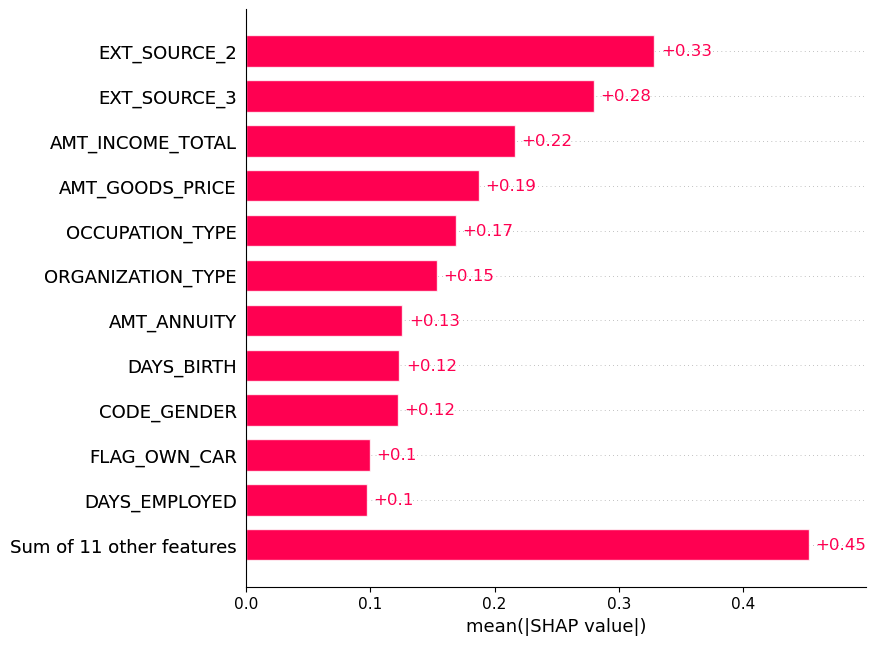

In [99]:
shap.plots.bar(shap_values, max_display=12)

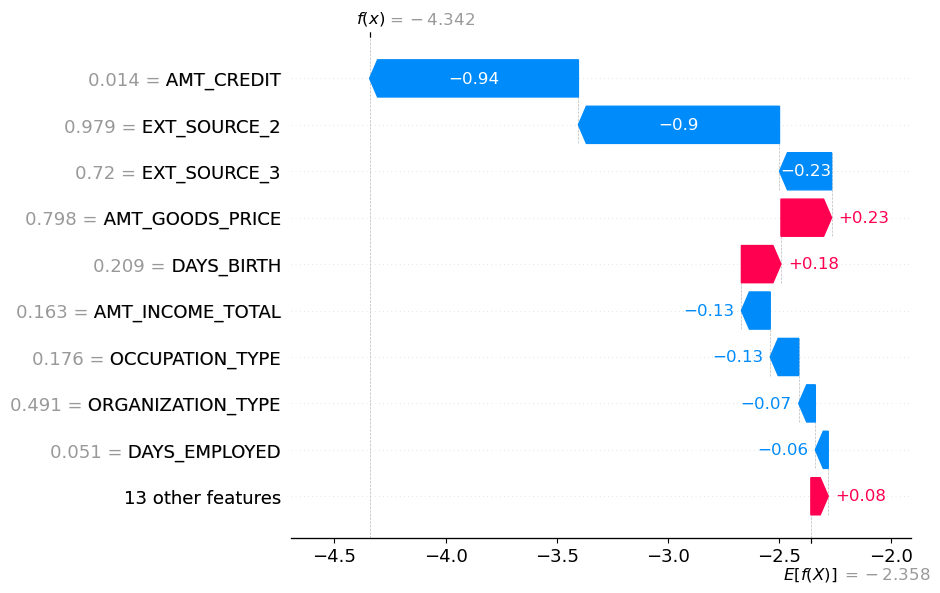

In [88]:
shap.plots.waterfall(shap_values[0])

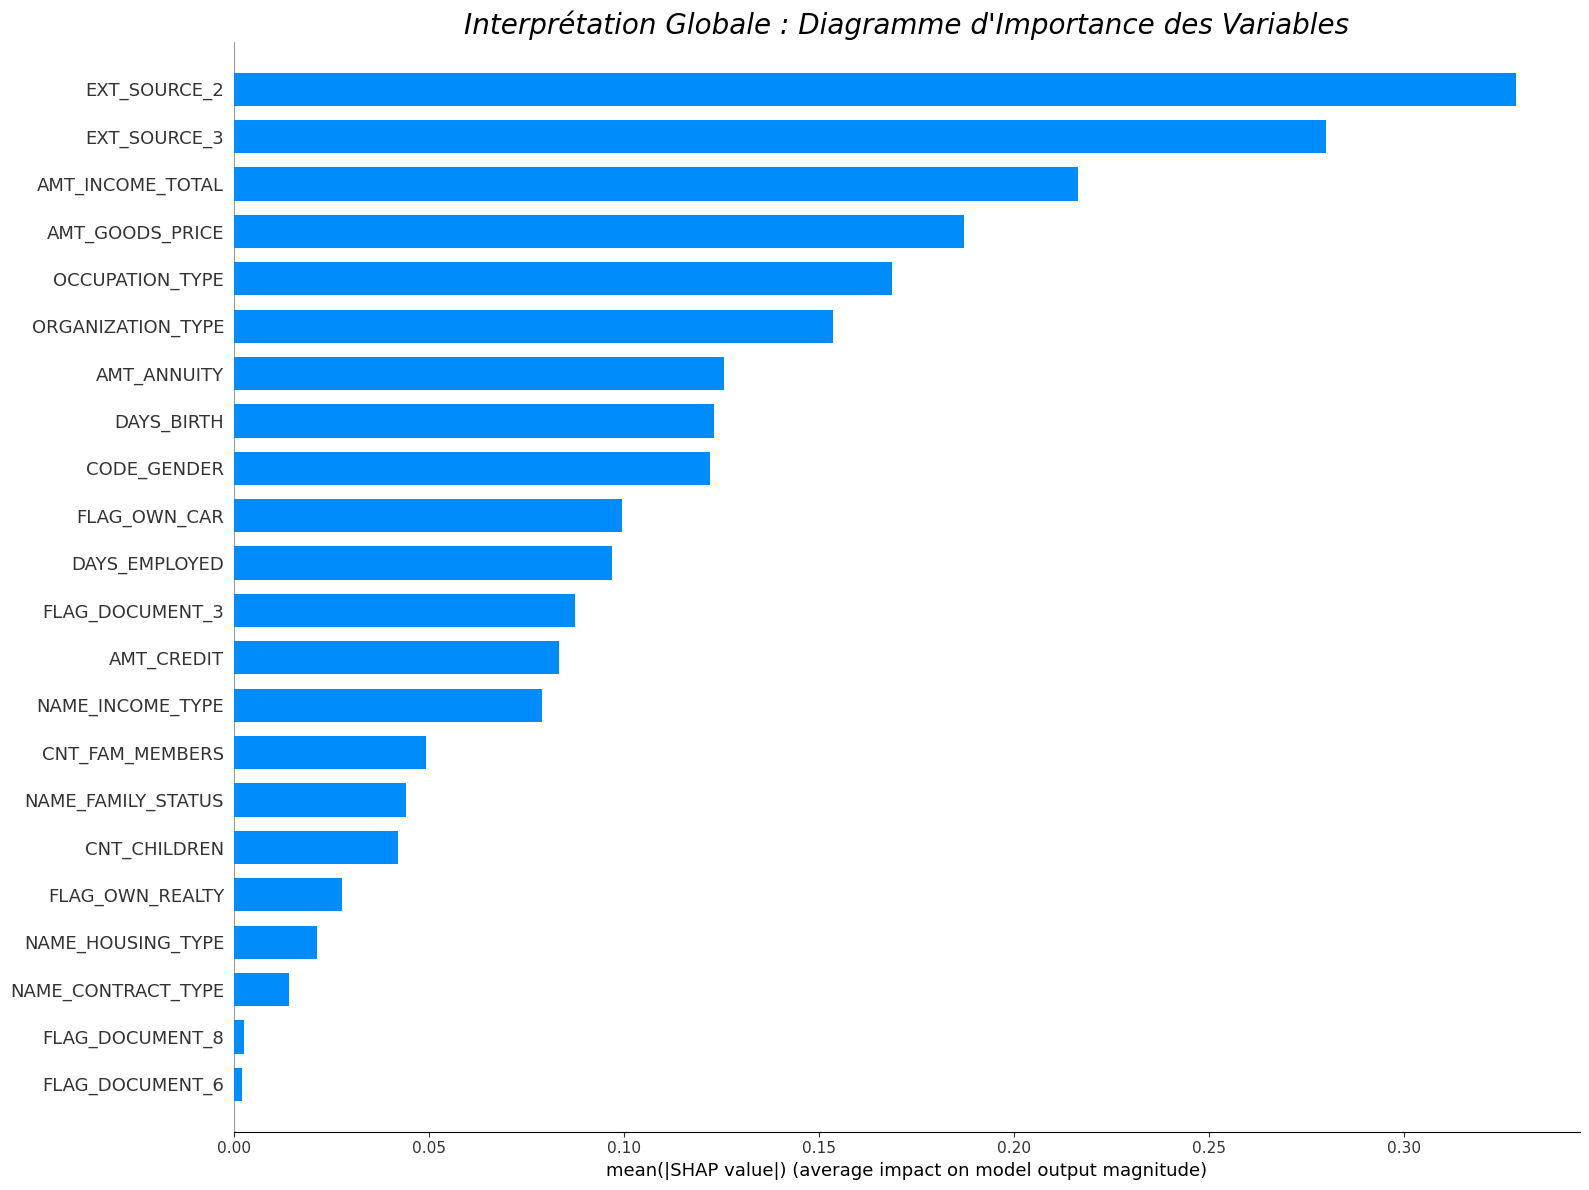

In [80]:
shap.summary_plot(shap_values, 
                  feature_names=x_test.columns,
                  plot_size=(16, 12),
                  plot_type="bar",
                  max_display=56,
                  show = False)
plt.title("Interprétation Globale : Diagramme d'Importance des Variables", fontsize=20, fontstyle='italic')
plt.tight_layout()
plt.show()